In [1]:
import gymnasium as gym
import numpy as np
import tqdm

In [2]:
env = gym.make("Taxi-v3")

In [7]:
observation, info = env.reset()
print(f'observation: {observation}')
print(f'info: {info}')

observation: 323
info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}


In [8]:
n_observations = env.observation_space.n
n_actions = env.action_space.n

print(f'Available actions: {n_actions}')
print(f'Available observations: {n_observations}')

Available actions: 6
Available observations: 500


In [9]:
Q_matrix = np.zeros((n_observations, n_actions))

In [10]:
learning_rate = 0.37
discount_factor = 0.907
epsilon = 0.388
min_epsilon = 0.01
decay_rate = 0.9964

In [11]:
total_episodes = 10000
total_rewards = []
totals_steps = []

for e in tqdm.tqdm(range(10000)):
    current_state, _ = env.reset()
    done = False
    total_reward = 0
    total_step = 0

    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()

        else:
            action = np.argmax(Q_matrix[current_state])

        next_state, reward, done, _, _ = env.step(action)

        Q_matrix[current_state, action] = (1.0 - learning_rate) * Q_matrix[current_state, action] + learning_rate * (reward + discount_factor * max(Q_matrix[next_state]))
        current_state = next_state
        total_reward += reward
        total_step += 1

    total_rewards.append(total_reward)
    totals_steps.append(total_step)
    epsilon = max(min_epsilon, epsilon * np.exp(-decay_rate))

100%|██████████| 10000/10000 [00:01<00:00, 7773.27it/s]


In [31]:
episodes = 50
total_reward_test = []
total_step_test = []

for _ in tqdm.tqdm(range(episodes)):
    done = False
    episode_reward = 0
    episode_step = 0
    current_state, _ = env.reset()

    while not done:
        action = np.argmax(Q_matrix[current_state])
        current_state, reward, done, _, _ = env.step(action)
        episode_reward += reward
        episode_step += 1


    total_step_test.append(episode_step)
    total_reward_test.append(episode_reward)

avg_steps = np.mean(total_step_test)
avg_rewards = np.mean(total_reward_test)

print(f"Nombre moyen d'étapes: {avg_steps:.2f}")
print(f"Récompense moyenne: {avg_rewards:.2f}")

env.close()

100%|██████████| 50/50 [00:00<00:00, 4371.34it/s]

Nombre moyen d'étapes: 12.90
Récompense moyenne: 8.10


In [32]:
import matplotlib.pyplot as plt
import numpy as np

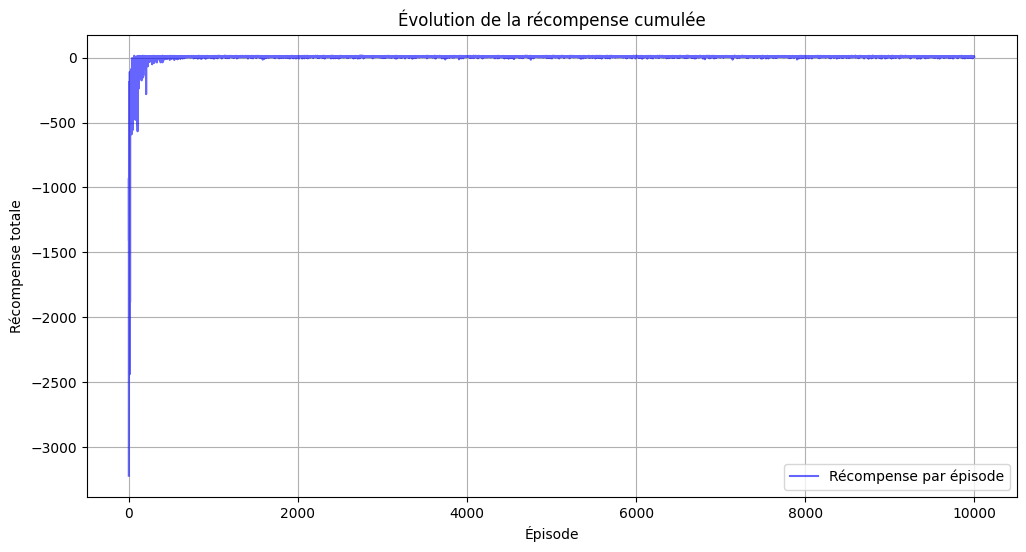

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(total_rewards, label="Récompense par épisode", color='blue', alpha=0.6)
plt.title("Évolution de la récompense cumulée")
plt.xlabel("Épisode")
plt.ylabel("Récompense totale")
plt.grid(True)
plt.legend()
plt.show()

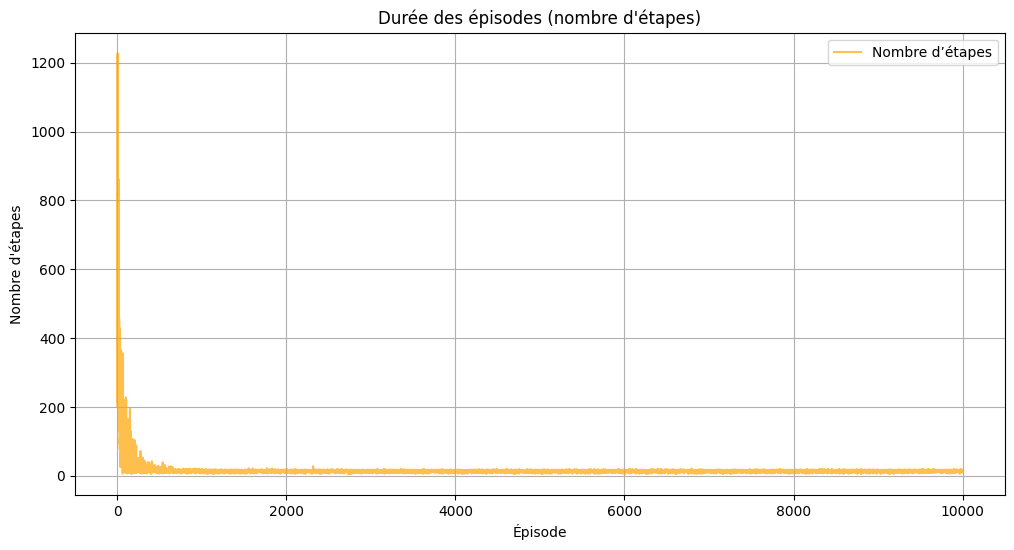

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(totals_steps, label="Nombre d’étapes", color='orange', alpha=0.7)
plt.title("Durée des épisodes (nombre d'étapes)")
plt.xlabel("Épisode")
plt.ylabel("Nombre d'étapes")
plt.grid(True)
plt.legend()
plt.show()


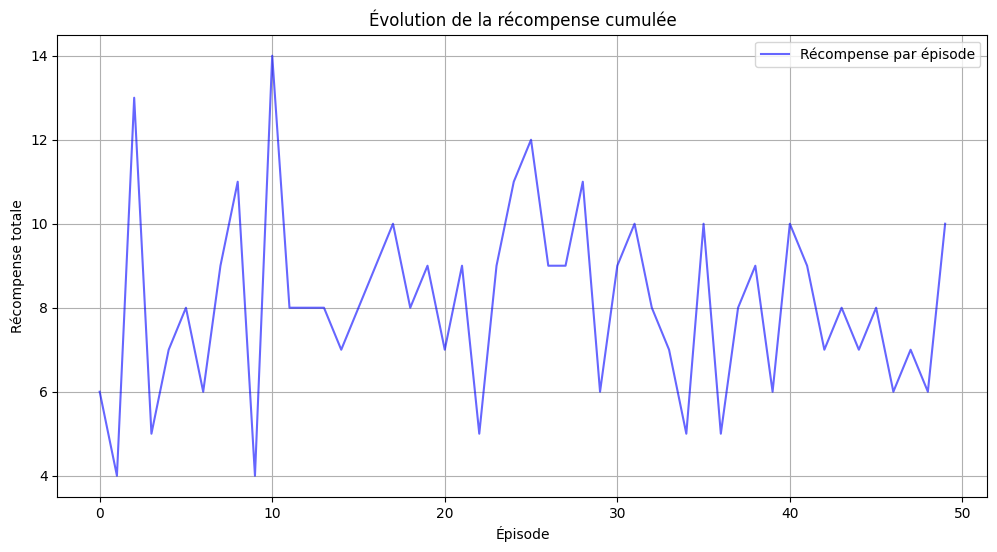

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(total_reward_test, label="Récompense par épisode", color='blue', alpha=0.6)
plt.title("Évolution de la récompense cumulée")
plt.xlabel("Épisode")
plt.ylabel("Récompense totale")
plt.grid(True)
plt.legend()
plt.show()

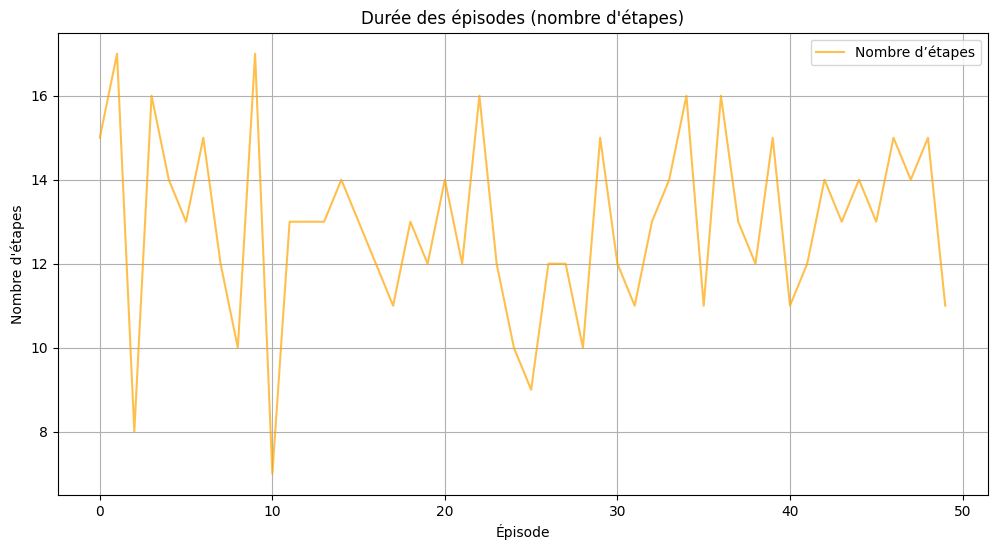

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(total_step_test, label="Nombre d’étapes", color='orange', alpha=0.7)
plt.title("Durée des épisodes (nombre d'étapes)")
plt.xlabel("Épisode")
plt.ylabel("Nombre d'étapes")
plt.grid(True)
plt.legend()
plt.show()
